In [1]:
import competition_committee as cc
# import helper_competition
from kaggle_environments import evaluate
import helper_general as hg

Loading environment football failed: No module named 'gfootball'


# Define your agent  below

In [ ]:
%%writefile players/Reactionary.py

import random
from kaggle_environments.envs.rps.utils import get_score

last_react_action = None
def reactionary(observation, configuration):
    global last_react_action
    if observation.step == 0:
        last_react_action = random.randrange(0, configuration.signs)
    elif get_score(last_react_action, observation.lastOpponentAction) <= 1:
        last_react_action = (observation.lastOpponentAction + 1) % configuration.signs

    return last_react_action

In [ ]:
%%writefile players/Ensemble.py

def win_action(action):
    '''
    return the action that would win the given action
    '''
    return (action + 1)%3



opp_moves = []
my_moves = []

def agent(observation, configuration):
    return 0
    

# Test Agent

In [9]:
trial_agent = 'players/' + 'BlueBelt_Decision_Tree.py'

result =  evaluate(
            "rps", 
            ['players/Spinoza.py', trial_agent],
            configuration={"episodeSteps": 1000})
print(result)

[[-25.0, 25.0]]


# Compete in the following

In [10]:
theGame  = cc.Competition()
theGame.players

['BlueBelt_Decision_Tree.py',
 'Backtracker_ver1.py',
 'BlackBelt_memory_patterns_v20.py',
 'copy_cat.py',
 'Spinoza.py',
 'BlueBelt_rfind.py',
 'paper_lover.py',
 'bigram.py',
 'Goldfish.py',
 'Psychology.py',
 'MemPat_ver7.py',
 'Most_Frequent.py',
 'nash_equilibrium.py',
 'Ensemble.py',
 'random_player.py',
 'tackleOCD.py',
 'Goldfish_killer.py',
 'rock_lover.py',
 'SemiRandom.py',
 'BlackBelt_Greenberg.py',
 'Backtracker_ver3.py',
 'Backtracker_ver2.py',
 'Reactionary.py',
 'scissors_lover.py']

,Agent,Score,Draw
4,Spinoza.py,203,6
10,MemPat_ver7.py,175,18
2,BlackBelt_memory_patterns_v20.py,171,8
0,BlueBelt_Decision_Tree.py,166,0
21,Backtracker_ver3.py,155,50
19,BlackBelt_Greenberg.py,153,41
22,Backtracker_ver2.py,150,56
1,Backtracker_ver1.py,147,-1
23,StratChanger_ver2.py,126,93
8,Goldfish.py,97,10


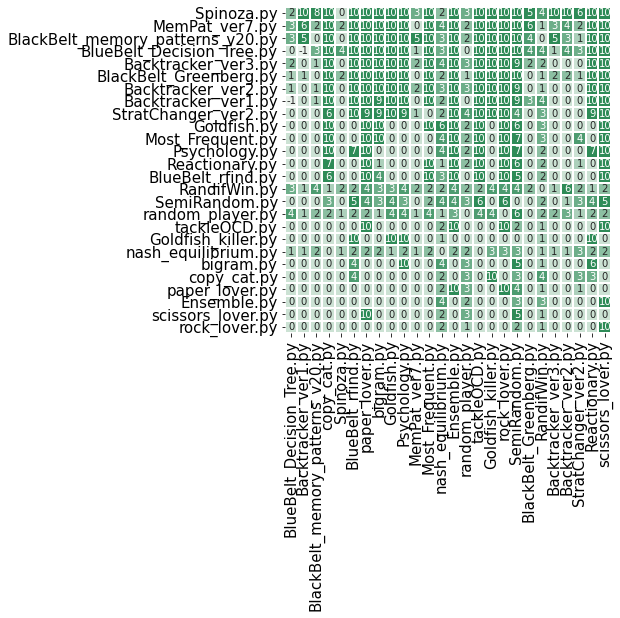

In [40]:
theGame.compete(rounds = 10)
display(theGame.rank_players())
theGame.match_matrix()

In [ ]:
model =  'goldfish_killer.py'
match_scores = theGame.prize_prez()
match_scores[(match_scores.P1 == model) | (match_scores.P2  == model)]

In [ ]:
import OneVOne as vs